# 국민건강영양조사 자료 중 구강검사데이터셋
---
출처 : https://knhanes.cdc.go.kr/knhanes/main.do
   

### 1. 구강검사(검진조사) 
 - 질병관리본부에서 수행중인 국민건강양영조사 중 구강검진조사 데이터이다
 - 매년 만 1세 이상을 대상으로 치아와 보철물 상태, 치주조직 상태, 칫솔질 실천을 포함한 구강건강관련 행태의 자료를 수집하고 있다.
 - 구강검진은 구강설문조사, 치아상태, 치주조직검사로 이루어져 있다. 
 - 공중보건치과의를 선발하여 교육훈련과정을 이수한 조사원이 구강검진을 수행한다. 

![구강검진](구강검진과정.png)
<출처: 국민건강영양조사 조사수행지침>

#### 1.1 치아상태
----
각 치아번호마다 아래의 값으로 코딩한다.

0. 건전치면
1. 우식치면
3. 우식경험처치치면
4. 우식경험상실치면
5. 우식비경험상실치면
6. 전색치면
7. 우식비경험처치치면
8. 미맹출치면
9. 기록불가치면
![구강검진](구강검진.png) 
<출처: 국민건강영양조사 조사수행지침>

#### 1.2. 치주질환
---
 - 치주질환(또는 치주병, 치주염)은 세균에 의해 발생되는 치아주위 잇몸의 염증성 질환으로 치주인대와 잇몸뼈의 파괴를 일으킨다.
 - 
 
![치주염](periodontitis.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


![치주탐침](cpi_probe.png)
<출처: 국민건강영양조사 조사수행지침>

 - 치주탐침을 잇몸에 찔러서 잇몸뼈의 위치까지 얼마나 깊이 들어가는지와 출혈을 관찰한다.
![치주낭검사](치주낭검사.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


 - 치주질환은 국민건강영양조사 구강건강실태 조사방법에 따라 지역사회치주지수(Community Periodontal Index, CPI)를 이용하여 치과의사가 시진과 촉진으로 검진한다.
 - 만 19세 이상의 대상자의 구강 내 6분악 중 검사표준 치아 상·하악의 좌·우측 제 1,2 대구치, 상악 우측 중절치, 하악 좌측 중절치를 치주 탐침 시 치주낭 깊이가 4 mm 이상 보유자를 치주질환자로 분류한다
 - 데이터셋의 치주조직상태 변수인 O_CPI_UR, O_CPI_UM, O_CPI_UL, O_CPI_LL으로 산출한 지표이다.

## 신경망 학습 목적
---
    치주질환을 검사하기 위한 치주낭 측정기(periodonal probe)를 치아에 찌르게 되면 출혈(이상이 있을 경우)과 통증이 유발된다. 또한 모든 치아를 검사해야 하는데 이는 시간소모가 많고 힘든 작업으로 알려져 있다. 주기적인 엑스레이 검사와 치주낭 측정 검사를 해야 사전에 치료가 가능하지만 주기적으로 하기 힘든게 현실이다. 치아 상태를 이용하여 치주질환을 분류하고자 한다. 

In [1]:
import pandas as pd

dt_raw = pd.read_sas("hn_dental_adj.sas7bdat").dropna() 

In [2]:
dt_raw.head()

,ID,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,...,O_TN73,O_TN74,O_TN75,O_CPI_UR,O_CPI_UM,O_CPI_UL,O_CPI_LR,O_CPI_LM,O_CPI_LL,NO_CPI_34
6224,b'A851913501',1.0,72.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
6226,b'A851915601',2.0,81.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6227,b'A851917101',1.0,62.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6228,b'A851917102',2.0,56.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0
6229,b'A851917701',1.0,55.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#자료가 제대로 읽어들여졌는지 확인한다.
print(dt_raw.shape)

(20453, 299)


In [41]:
# 변수명 확인하기
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 299 entries, ID to NO_CPI_34
dtypes: float64(298), object(1)
memory usage: 46.8+ MB


In [42]:
# 자료를 복사하여 사용하고 원자료는 조작하지 않는다
dt = dt_raw.copy()

In [43]:
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 10) for i in range(19, 80, 10)]
dt['age']=dt.age.astype('int64')
dt['age'] = pd.cut(dt.age, range(19, 90, 10), right=False, labels=labels)

In [44]:
# 불필요한 변수 삭제
dt = dt.drop(columns = ['ID','O_CPI_UR','O_CPI_UM','O_CPI_UL','O_CPI_LL'], axis = 1)

In [46]:
dt.shape

(20453, 294)

In [47]:
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


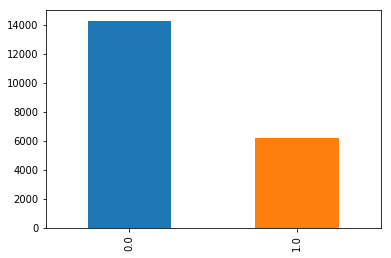

In [48]:
# 치주질환 빈도 확인
import matplotlib.pyplot as plt
dt['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

In [49]:
## 변수들의 빈도 확인

In [50]:
#범주형 변수를 카테고리 속성으로 변경
for i in dt.columns:
    dt[i]=pd.Categorical(dt[i])

In [51]:
# 변경되었는지 확인
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 294 entries, sex to NO_CPI_34
dtypes: category(294)
memory usage: 6.0 MB


In [52]:
import numpy as np

In [53]:
##변경후 데이터 확인
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 타겟변수 생성
---


In [54]:
# 요약 확인
dt.describe()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
count,20453.0,20451,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0
unique,2.0,7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,2.0
top,2.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
freq,11796.0,4064,14251.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,12495.0,10773.0,14273.0


In [55]:
dt['NO_CPI_34'].describe()

count     20453.0
unique        2.0
top           0.0
freq      14273.0
Name: NO_CPI_34, dtype: float64

In [56]:
print(dt['NO_CPI_34'].value_counts())

0.0    14273
1.0     6180
Name: NO_CPI_34, dtype: int64


In [57]:
dt.shape

(20453, 294)

In [58]:
# 피쳐와 타겟을 분리한다.

periodontitis = dt[['NO_CPI_34']]
features_dt = dt.drop(columns = ['NO_CPI_34'], axis = 1)

In [59]:
#disease_dt = disease_dt.np.astype()

In [60]:
#disease_dt = pd.get_dummies(disease_dt.DM)

In [61]:
#disease_dt=disease_dt.rename({0:'Normal', 1:'Diabetes'},axis='columns')
periodontitis.head()

,NO_CPI_34
6224,1.0
6226,0.0
6227,0.0
6228,0.0
6229,0.0


In [62]:
features_dt_sc =  pd.get_dummies(features_dt)

In [63]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_sc, periodontitis, random_state=20181121)

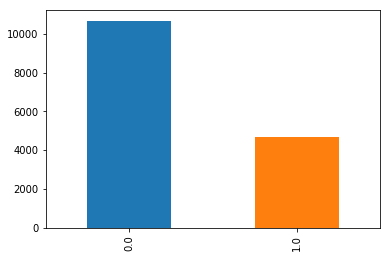

In [64]:
import matplotlib.pyplot as plt
y_train['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

### 신경망 모형 만들기 

In [65]:
#target의 척도를 지정한다. 중요하다.
target_cat = pd.api.types.CategoricalDtype(categories=range(2), ordered=False)
print(target_cat.categories)

RangeIndex(start=0, stop=2, step=1)


In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15339, 1579)
(5114, 1579)
(15339, 1)
(5114, 1)


In [67]:
#y_train = y_train.astype(target_cat)
#y_test = y_test.astype(target_cat)
#print(y_train.dtype)
#print(y_test.dtype)

In [68]:
##nb = number
nb_tr_examples, nb_inputs = X_train.shape
#hidden layer
nb_units_hl_1 = 50
#output number를 타겟의 행과열의수 1
nb_outputs = y_train.shape[1]
print(nb_tr_examples, nb_inputs, nb_units_hl_1, nb_outputs)

15339 1579 50 1


In [69]:
y_train.head()

,NO_CPI_34
15829,0.0
26465,0.0
24547,0.0
18107,0.0
8612,0.0


In [70]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import metrics

from keras.optimizers import SGD, Adam, RMSprop
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.09, amsgrad=False)
#sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

def create_model(optimizer='adam', activation='sigmoid'):
    
    model = Sequential()

    ##인풋의 수와 히든층의 수
    model.add(Dense(nb_units_hl_1, input_dim = nb_inputs, activation=activation))
    #아웃풋레이어의 수
    model.add(Dense(nb_outputs, activation=activation))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [71]:
import numpy
seed = 20181121
numpy. random.seed(seed)

# model parameters를 매개변수로 받아 모형을 동적으로 생성한다. 

def create_model(optimizer, lr):
    
    model = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model.add(hl_1)
    hl_1_act = Activation('sigmoid')
    model.add(hl_1_act)
    ol = Dense(nb_outputs)
    model.add(ol)
    ol_act = Activation('sigmoid')
    model.add(ol_act)
    
    if optimizer == 'sgd':
        optim = SGD(lr=lr)
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)
    
    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [72]:
model = KerasClassifier(build_fn=create_model)

In [73]:
# 모형을 컴파일할 때와 컴파일된 모형을 훈력(fit)할 때 전달한 매개변수에
# 전달할 값들을 사전으로 만든다.
# 전달할 매개변수의 이름과 개수가 다른 경우에는 list of dictionaries를 만든다. 
optimizers = ['sgd','adam','rmsprop']

lr = [0.001, 0.01]

epochs = [5, 10, 30]
batches = [20, 30, 50]

param_grid = dict(optimizer = optimizers, lr=lr, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3, random_state=20181121)

In [74]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['accuracy'], refit="accuracy", return_train_score=True, cv=kfold)

# KerasClassifier 내에서 target을 one-hot encoding하므로
# Keras NN model을 sklearn을 연결할 때 one-hot encoding 하지 않은 target을 사용한다. 

grid_result = grid.fit(X_train, y_train)

Epoch 1/5
10225/10225 [==============================] - 1s 54us/step - loss: 0.6286 - acc: 0.6570
Epoch 2/5
10225/10225 [==============================] - 1s 58us/step - loss: 0.6004 - acc: 0.6957
Epoch 3/5
10225/10225 [==============================] - 1s 70us/step - loss: 0.5965 - acc: 0.6959
Epoch 4/5
10225/10225 [==============================] - 1s 64us/step - loss: 0.5931 - acc: 0.6946
Epoch 5/5
10225/10225 [==============================] - 1s 57us/step - loss: 0.5901 - acc: 0.6935
Epoch 1/5
10226/10226 [==============================] - 0s 48us/step - loss: 0.6129 - acc: 0.6956
Epoch 2/5
10226/10226 [==============================] - 0s 47us/step - loss: 0.6072 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 1s 50us/step - loss: 0.6025 - acc: 0.6956
Epoch 4/5
10226/10226 [==============================] - 0s 47us/step - loss: 0.5985 - acc: 0.6956
Epoch 5/5
10226/10226 [==============================] - 1s 52us/step - loss: 0.5950 - acc: 0.6956
Epoch 1/5


10226/10226 [==============================] - 1s 77us/step - loss: 0.3965 - acc: 0.8318
Epoch 4/5
10226/10226 [==============================] - 1s 77us/step - loss: 0.3759 - acc: 0.8400
Epoch 5/5
10226/10226 [==============================] - 1s 80us/step - loss: 0.3685 - acc: 0.8448
Epoch 1/5
10227/10227 [==============================] - 1s 94us/step - loss: 0.5375 - acc: 0.7344
Epoch 2/5
10227/10227 [==============================] - 1s 78us/step - loss: 0.4207 - acc: 0.8165
Epoch 3/5
10227/10227 [==============================] - 1s 78us/step - loss: 0.3924 - acc: 0.8309
Epoch 4/5
10227/10227 [==============================] - 1s 81us/step - loss: 0.3795 - acc: 0.8411
Epoch 5/5
10227/10227 [==============================] - 1s 84us/step - loss: 0.3783 - acc: 0.8399
Epoch 1/10
10225/10225 [==============================] - 1s 50us/step - loss: 0.6291 - acc: 0.6577
Epoch 2/10
10225/10225 [==============================] - 0s 47us/step - loss: 0.6015 - acc: 0.6956
Epoch 3/10
10225/1

10226/10226 [==============================] - 1s 69us/step - loss: 0.3572 - acc: 0.8475
Epoch 6/10
10226/10226 [==============================] - 1s 69us/step - loss: 0.3514 - acc: 0.8509
Epoch 7/10
10226/10226 [==============================] - 1s 66us/step - loss: 0.3463 - acc: 0.8543
Epoch 8/10
10226/10226 [==============================] - 1s 66us/step - loss: 0.3424 - acc: 0.8548
Epoch 9/10
10226/10226 [==============================] - 1s 69us/step - loss: 0.3376 - acc: 0.8594
Epoch 10/10
10226/10226 [==============================] - 1s 70us/step - loss: 0.3311 - acc: 0.8591
Epoch 1/10
10227/10227 [==============================] - 1s 71us/step - loss: 0.5058 - acc: 0.7561
Epoch 2/10
10227/10227 [==============================] - 1s 70us/step - loss: 0.4035 - acc: 0.8242
Epoch 3/10
10227/10227 [==============================] - 1s 70us/step - loss: 0.3708 - acc: 0.8437
Epoch 4/10
10227/10227 [==============================] - 1s 73us/step - loss: 0.3553 - acc: 0.8485
Epoch 5/10

10225/10225 [==============================] - 1s 85us/step - loss: 0.3652 - acc: 0.8475
Epoch 7/10
10225/10225 [==============================] - 1s 90us/step - loss: 0.3601 - acc: 0.8484
Epoch 8/10
10225/10225 [==============================] - 1s 81us/step - loss: 0.3537 - acc: 0.8552
Epoch 9/10
10225/10225 [==============================] - 1s 85us/step - loss: 0.3553 - acc: 0.8500
Epoch 10/10
10225/10225 [==============================] - 1s 82us/step - loss: 0.3491 - acc: 0.8580
Epoch 1/10
10226/10226 [==============================] - ETA: 0s - loss: 0.5390 - acc: 0.730 - 1s 67us/step - loss: 0.5317 - acc: 0.7352
Epoch 2/10
10226/10226 [==============================] - 1s 70us/step - loss: 0.4309 - acc: 0.8083
Epoch 3/10
10226/10226 [==============================] - 1s 77us/step - loss: 0.3999 - acc: 0.8306
Epoch 4/10
10226/10226 [==============================] - 1s 82us/step - loss: 0.3873 - acc: 0.8374
Epoch 5/10
10226/10226 [==============================] - 1s 85us/step -

10226/10226 [==============================] - 0s 48us/step - loss: 0.5544 - acc: 0.7053
Epoch 27/30
10226/10226 [==============================] - 1s 50us/step - loss: 0.5525 - acc: 0.7045
Epoch 28/30
10226/10226 [==============================] - 0s 47us/step - loss: 0.5506 - acc: 0.7062
Epoch 29/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.5486 - acc: 0.7066
Epoch 30/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.5467 - acc: 0.7071
Epoch 1/30
10227/10227 [==============================] - 0s 47us/step - loss: 0.6157 - acc: 0.6859
Epoch 2/30
10227/10227 [==============================] - 1s 55us/step - loss: 0.5986 - acc: 0.6955
Epoch 3/30
10227/10227 [==============================] - 1s 51us/step - loss: 0.5953 - acc: 0.6954
Epoch 4/30
10227/10227 [==============================] - 1s 50us/step - loss: 0.5924 - acc: 0.6953
Epoch 5/30
10227/10227 [==============================] - 1s 50us/step - loss: 0.5898 - acc: 0.6950
Epoch 6

10226/10226 [==============================] - 1s 79us/step - loss: 0.2733 - acc: 0.8900
Epoch 18/30
10226/10226 [==============================] - 1s 74us/step - loss: 0.2641 - acc: 0.8963
Epoch 19/30
10226/10226 [==============================] - 1s 88us/step - loss: 0.2581 - acc: 0.8995
Epoch 20/30
10226/10226 [==============================] - 1s 80us/step - loss: 0.2514 - acc: 0.9028
Epoch 21/30
10226/10226 [==============================] - 1s 78us/step - loss: 0.2453 - acc: 0.9029
Epoch 22/30
10226/10226 [==============================] - 1s 83us/step - loss: 0.2372 - acc: 0.9078
Epoch 23/30
10226/10226 [==============================] - 1s 74us/step - loss: 0.2312 - acc: 0.9123
Epoch 24/30
10226/10226 [==============================] - 1s 79us/step - loss: 0.2248 - acc: 0.9159
Epoch 25/30
10226/10226 [==============================] - 1s 82us/step - loss: 0.2156 - acc: 0.9196
Epoch 26/30
10226/10226 [==============================] - 1s 84us/step - loss: 0.2118 - acc: 0.9217
Ep

10226/10226 [==============================] - 1s 68us/step - loss: 0.3425 - acc: 0.8535
Epoch 9/30
10226/10226 [==============================] - 1s 72us/step - loss: 0.3349 - acc: 0.8589
Epoch 10/30
10226/10226 [==============================] - 1s 71us/step - loss: 0.3319 - acc: 0.8581
Epoch 11/30
10226/10226 [==============================] - 1s 67us/step - loss: 0.3263 - acc: 0.8610
Epoch 12/30
10226/10226 [==============================] - 1s 71us/step - loss: 0.3223 - acc: 0.8638
Epoch 13/30
10226/10226 [==============================] - 1s 71us/step - loss: 0.3178 - acc: 0.8656
Epoch 14/30
10226/10226 [==============================] - 1s 67us/step - loss: 0.3144 - acc: 0.8677
Epoch 15/30
10226/10226 [==============================] - 1s 69us/step - loss: 0.3101 - acc: 0.8717
Epoch 16/30
10226/10226 [==============================] - 1s 70us/step - loss: 0.3066 - acc: 0.8741
Epoch 17/30
10226/10226 [==============================] - 1s 74us/step - loss: 0.3018 - acc: 0.8728
Epo

10225/10225 [==============================] - 1s 59us/step - loss: 0.3548 - acc: 0.8506
Epoch 30/30
10225/10225 [==============================] - 0s 49us/step - loss: 0.3522 - acc: 0.8505
Epoch 1/30
10226/10226 [==============================] - 0s 49us/step - loss: 0.5948 - acc: 0.6965
Epoch 2/30
10226/10226 [==============================] - 0s 48us/step - loss: 0.5700 - acc: 0.6948
Epoch 3/30
10226/10226 [==============================] - 1s 49us/step - loss: 0.5506 - acc: 0.7049
Epoch 4/30
10226/10226 [==============================] - 0s 48us/step - loss: 0.5320 - acc: 0.7175
Epoch 5/30
10226/10226 [==============================] - 1s 50us/step - loss: 0.5140 - acc: 0.7386
Epoch 6/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.4969 - acc: 0.7523
Epoch 7/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.4812 - acc: 0.7714
Epoch 8/30
10226/10226 [==============================] - 1s 88us/step - loss: 0.4670 - acc: 0.7840
Epoch 9/30

10225/10225 [==============================] - 2s 225us/step - loss: 0.3262 - acc: 0.8582
Epoch 21/30
10225/10225 [==============================] - 2s 225us/step - loss: 0.3371 - acc: 0.8518
Epoch 22/30
10225/10225 [==============================] - 2s 221us/step - loss: 0.3454 - acc: 0.8523
Epoch 23/30
10225/10225 [==============================] - 2s 229us/step - loss: 0.3566 - acc: 0.8438
Epoch 24/30
10225/10225 [==============================] - 2s 226us/step - loss: 0.3230 - acc: 0.8608
Epoch 25/30
10225/10225 [==============================] - 2s 217us/step - loss: 0.3284 - acc: 0.8588
Epoch 26/30
10225/10225 [==============================] - 2s 224us/step - loss: 0.3286 - acc: 0.8578
Epoch 27/30
10225/10225 [==============================] - 2s 236us/step - loss: 0.3212 - acc: 0.8619
Epoch 28/30
10225/10225 [==============================] - 2s 230us/step - loss: 0.3306 - acc: 0.8566
Epoch 29/30
10225/10225 [==============================] - 2s 240us/step - loss: 0.3230 - acc:

10225/10225 [==============================] - 1s 85us/step - loss: 0.3498 - acc: 0.8575
Epoch 11/30
10225/10225 [==============================] - 1s 90us/step - loss: 0.3583 - acc: 0.8522
Epoch 12/30
10225/10225 [==============================] - 1s 88us/step - loss: 0.3450 - acc: 0.8606
Epoch 13/30
10225/10225 [==============================] - 1s 92us/step - loss: 0.3428 - acc: 0.8600
Epoch 14/30
10225/10225 [==============================] - 1s 120us/step - loss: 0.3344 - acc: 0.8663
Epoch 15/30
10225/10225 [==============================] - 2s 162us/step - loss: 0.3320 - acc: 0.8649
Epoch 16/30
10225/10225 [==============================] - 1s 102us/step - loss: 0.3333 - acc: 0.8660
Epoch 17/30
10225/10225 [==============================] - 2s 180us/step - loss: 0.3266 - acc: 0.8705
Epoch 18/30
10225/10225 [==============================] - 1s 97us/step - loss: 0.3270 - acc: 0.8708
Epoch 19/30
10225/10225 [==============================] - 1s 123us/step - loss: 0.3194 - acc: 0.87

10225/10225 [==============================] - 0s 44us/step - loss: 0.6137 - acc: 0.6956
Epoch 2/5
10225/10225 [==============================] - 0s 45us/step - loss: 0.6089 - acc: 0.6956
Epoch 3/5
10225/10225 [==============================] - 0s 41us/step - loss: 0.6048 - acc: 0.6956
Epoch 4/5
10225/10225 [==============================] - 0s 41us/step - loss: 0.6013 - acc: 0.6956
Epoch 5/5
10225/10225 [==============================] - 0s 42us/step - loss: 0.5981 - acc: 0.6956
Epoch 1/5
10226/10226 [==============================] - 0s 40us/step - loss: 0.6715 - acc: 0.6002
Epoch 2/5
10226/10226 [==============================] - 0s 45us/step - loss: 0.6071 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 0s 42us/step - loss: 0.6046 - acc: 0.6956
Epoch 4/5
10226/10226 [==============================] - 0s 44us/step - loss: 0.6026 - acc: 0.6958
Epoch 5/5
10226/10226 [==============================] - 0s 42us/step - loss: 0.6008 - acc: 0.6958
Epoch 1/5
10227/1022

10226/10226 [==============================] - 1s 59us/step - loss: 0.4010 - acc: 0.8304
Epoch 4/5
10226/10226 [==============================] - 1s 58us/step - loss: 0.3818 - acc: 0.8386
Epoch 5/5
10226/10226 [==============================] - 1s 59us/step - loss: 0.3728 - acc: 0.8429
Epoch 1/5
10227/10227 [==============================] - 1s 55us/step - loss: 0.5535 - acc: 0.7187
Epoch 2/5
10227/10227 [==============================] - 1s 57us/step - loss: 0.4422 - acc: 0.8018
Epoch 3/5
10227/10227 [==============================] - 1s 59us/step - loss: 0.3952 - acc: 0.8280
Epoch 4/5
10227/10227 [==============================] - 1s 59us/step - loss: 0.3804 - acc: 0.8392
Epoch 5/5
10227/10227 [==============================] - 1s 58us/step - loss: 0.3638 - acc: 0.8494
Epoch 1/10
10225/10225 [==============================] - 0s 41us/step - loss: 0.6206 - acc: 0.6956
Epoch 2/10
10225/10225 [==============================] - 0s 45us/step - loss: 0.6109 - acc: 0.6956
Epoch 3/10
10225/1

10226/10226 [==============================] - 1s 59us/step - loss: 0.3627 - acc: 0.8428
Epoch 6/10
10226/10226 [==============================] - 1s 53us/step - loss: 0.3544 - acc: 0.8517
Epoch 7/10
10226/10226 [==============================] - 1s 56us/step - loss: 0.3494 - acc: 0.8515
Epoch 8/10
10226/10226 [==============================] - 1s 54us/step - loss: 0.3468 - acc: 0.8505
Epoch 9/10
10226/10226 [==============================] - 1s 54us/step - loss: 0.3412 - acc: 0.8544
Epoch 10/10
10226/10226 [==============================] - 1s 55us/step - loss: 0.3363 - acc: 0.8539
Epoch 1/10
10227/10227 [==============================] - 1s 56us/step - loss: 0.5219 - acc: 0.7399
Epoch 2/10
10227/10227 [==============================] - 1s 56us/step - loss: 0.4253 - acc: 0.8134
Epoch 3/10
10227/10227 [==============================] - 1s 59us/step - loss: 0.3833 - acc: 0.8374
Epoch 4/10
10227/10227 [==============================] - 1s 57us/step - loss: 0.3646 - acc: 0.8465
Epoch 5/10

10225/10225 [==============================] - 1s 59us/step - loss: 0.3605 - acc: 0.8475
Epoch 7/10
10225/10225 [==============================] - 1s 62us/step - loss: 0.3512 - acc: 0.8520
Epoch 8/10
10225/10225 [==============================] - 1s 68us/step - loss: 0.3514 - acc: 0.8534
Epoch 9/10
10225/10225 [==============================] - 1s 70us/step - loss: 0.3488 - acc: 0.8568
Epoch 10/10
10225/10225 [==============================] - 1s 71us/step - loss: 0.3368 - acc: 0.8616
Epoch 1/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.5472 - acc: 0.7312
Epoch 2/10
10226/10226 [==============================] - 1s 56us/step - loss: 0.4502 - acc: 0.7983
Epoch 3/10
10226/10226 [==============================] - 1s 60us/step - loss: 0.4073 - acc: 0.8240
Epoch 4/10
10226/10226 [==============================] - 1s 58us/step - loss: 0.3892 - acc: 0.8345
Epoch 5/10
10226/10226 [==============================] - 1s 62us/step - loss: 0.3802 - acc: 0.8383
Epoch 6/10

10226/10226 [==============================] - 0s 42us/step - loss: 0.5598 - acc: 0.6994
Epoch 28/30
10226/10226 [==============================] - 0s 41us/step - loss: 0.5584 - acc: 0.7001
Epoch 29/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.5571 - acc: 0.7011
Epoch 30/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.5558 - acc: 0.7017
Epoch 1/30
10227/10227 [==============================] - 1s 63us/step - loss: 0.6568 - acc: 0.6155
Epoch 2/30
10227/10227 [==============================] - 0s 43us/step - loss: 0.6066 - acc: 0.6955
Epoch 3/30
10227/10227 [==============================] - 0s 44us/step - loss: 0.6040 - acc: 0.6955
Epoch 4/30
10227/10227 [==============================] - 0s 44us/step - loss: 0.6018 - acc: 0.6955
Epoch 5/30
10227/10227 [==============================] - 0s 43us/step - loss: 0.5997 - acc: 0.6955
Epoch 6/30
10227/10227 [==============================] - 0s 43us/step - loss: 0.5978 - acc: 0.6955
Epoch 7/

10226/10226 [==============================] - 1s 61us/step - loss: 0.2877 - acc: 0.8802
Epoch 18/30
10226/10226 [==============================] - 1s 55us/step - loss: 0.2843 - acc: 0.8847
Epoch 19/30
10226/10226 [==============================] - 1s 58us/step - loss: 0.2773 - acc: 0.8889
Epoch 20/30
10226/10226 [==============================] - 1s 58us/step - loss: 0.2733 - acc: 0.8917
Epoch 21/30
10226/10226 [==============================] - 1s 59us/step - loss: 0.2648 - acc: 0.8941
Epoch 22/30
10226/10226 [==============================] - 1s 62us/step - loss: 0.2607 - acc: 0.8953
Epoch 23/30
10226/10226 [==============================] - 1s 58us/step - loss: 0.2534 - acc: 0.9001
Epoch 24/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.2463 - acc: 0.9032
Epoch 25/30
10226/10226 [==============================] - 1s 57us/step - loss: 0.2415 - acc: 0.9076
Epoch 26/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.2362 - acc: 0.9110
Ep

10226/10226 [==============================] - 1s 50us/step - loss: 0.3445 - acc: 0.8544
Epoch 9/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.3408 - acc: 0.8555
Epoch 10/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.3369 - acc: 0.8572
Epoch 11/30
10226/10226 [==============================] - 0s 47us/step - loss: 0.3328 - acc: 0.8608
Epoch 12/30
10226/10226 [==============================] - 0s 47us/step - loss: 0.3297 - acc: 0.8614
Epoch 13/30
10226/10226 [==============================] - 1s 52us/step - loss: 0.3244 - acc: 0.8636
Epoch 14/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3191 - acc: 0.8648
Epoch 15/30
10226/10226 [==============================] - 1s 52us/step - loss: 0.3173 - acc: 0.8654
Epoch 16/30
10226/10226 [==============================] - 1s 49us/step - loss: 0.3126 - acc: 0.8689
Epoch 17/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.3070 - acc: 0.8702
Epo

10225/10225 [==============================] - 1s 68us/step - loss: 0.3746 - acc: 0.8406
Epoch 29/30
10225/10225 [==============================] - 1s 73us/step - loss: 0.3726 - acc: 0.8416
Epoch 30/30
10225/10225 [==============================] - 1s 68us/step - loss: 0.3702 - acc: 0.8408
Epoch 1/30
10226/10226 [==============================] - 1s 54us/step - loss: 0.6081 - acc: 0.6794
Epoch 2/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.5816 - acc: 0.6909
Epoch 3/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.5696 - acc: 0.6951
Epoch 4/30
10226/10226 [==============================] - 0s 45us/step - loss: 0.5569 - acc: 0.7021
Epoch 5/30
10226/10226 [==============================] - 0s 49us/step - loss: 0.5441 - acc: 0.7108
Epoch 6/30
10226/10226 [==============================] - 0s 48us/step - loss: 0.5308 - acc: 0.7250
Epoch 7/30
10226/10226 [==============================] - 1s 56us/step - loss: 0.5176 - acc: 0.7343
Epoch 8/3

10225/10225 [==============================] - 1s 138us/step - loss: 0.3324 - acc: 0.8584
Epoch 20/30
10225/10225 [==============================] - 1s 143us/step - loss: 0.3261 - acc: 0.8595
Epoch 21/30
10225/10225 [==============================] - 1s 138us/step - loss: 0.3263 - acc: 0.8599
Epoch 22/30
10225/10225 [==============================] - 1s 131us/step - loss: 0.3237 - acc: 0.8588
Epoch 23/30
10225/10225 [==============================] - 1s 129us/step - loss: 0.3224 - acc: 0.8648
Epoch 24/30
10225/10225 [==============================] - 1s 135us/step - loss: 0.3270 - acc: 0.8644
Epoch 25/30
10225/10225 [==============================] - 1s 137us/step - loss: 0.3160 - acc: 0.8679
Epoch 26/30
10225/10225 [==============================] - 2s 153us/step - loss: 0.3194 - acc: 0.8618
Epoch 27/30
10225/10225 [==============================] - 2s 155us/step - loss: 0.3094 - acc: 0.8677
Epoch 28/30
10225/10225 [==============================] - 2s 156us/step - loss: 0.3176 - acc:

10225/10225 [==============================] - 1s 66us/step - loss: 0.3436 - acc: 0.8608
Epoch 10/30
10225/10225 [==============================] - 1s 64us/step - loss: 0.3429 - acc: 0.8577
Epoch 11/30
10225/10225 [==============================] - 1s 67us/step - loss: 0.3363 - acc: 0.8621
Epoch 12/30
10225/10225 [==============================] - 1s 74us/step - loss: 0.3386 - acc: 0.8616
Epoch 13/30
10225/10225 [==============================] - 1s 67us/step - loss: 0.3295 - acc: 0.8649
Epoch 14/30
10225/10225 [==============================] - 1s 72us/step - loss: 0.3245 - acc: 0.8678
Epoch 15/30
10225/10225 [==============================] - 1s 75us/step - loss: 0.3233 - acc: 0.8724
Epoch 16/30
10225/10225 [==============================] - 1s 75us/step - loss: 0.3225 - acc: 0.8732
Epoch 17/30
10225/10225 [==============================] - 1s 82us/step - loss: 0.3100 - acc: 0.8753
Epoch 18/30
10225/10225 [==============================] - 1s 95us/step - loss: 0.3115 - acc: 0.8735
Ep

10227/10227 [==============================] - 1s 96us/step - loss: 0.2788 - acc: 0.8915
Epoch 30/30
10227/10227 [==============================] - 1s 89us/step - loss: 0.2779 - acc: 0.8944
Epoch 1/5
10225/10225 [==============================] - 0s 39us/step - loss: 0.6256 - acc: 0.6955
Epoch 2/5
10225/10225 [==============================] - 0s 38us/step - loss: 0.6083 - acc: 0.6956
Epoch 3/5
10225/10225 [==============================] - 0s 43us/step - loss: 0.6057 - acc: 0.6956
Epoch 4/5
10225/10225 [==============================] - 0s 41us/step - loss: 0.6040 - acc: 0.6956
Epoch 5/5
10225/10225 [==============================] - 0s 41us/step - loss: 0.6023 - acc: 0.6956
Epoch 1/5
10226/10226 [==============================] - 0s 47us/step - loss: 0.6343 - acc: 0.6821
Epoch 2/5
10226/10226 [==============================] - 0s 42us/step - loss: 0.6123 - acc: 0.6956
Epoch 3/5
10226/10226 [==============================] - 0s 39us/step - loss: 0.6085 - acc: 0.6956
Epoch 4/5
10226/10

10226/10226 [==============================] - 1s 51us/step - loss: 0.5859 - acc: 0.7089
Epoch 2/5
10226/10226 [==============================] - 1s 55us/step - loss: 0.4761 - acc: 0.7771
Epoch 3/5
10226/10226 [==============================] - 1s 51us/step - loss: 0.4209 - acc: 0.8170
Epoch 4/5
10226/10226 [==============================] - 0s 48us/step - loss: 0.3904 - acc: 0.8315
Epoch 5/5
10226/10226 [==============================] - 1s 62us/step - loss: 0.3730 - acc: 0.8422
Epoch 1/5
10227/10227 [==============================] - 0s 49us/step - loss: 0.5723 - acc: 0.7106
Epoch 2/5
10227/10227 [==============================] - 1s 51us/step - loss: 0.4700 - acc: 0.7844
Epoch 3/5
10227/10227 [==============================] - 1s 50us/step - loss: 0.4093 - acc: 0.8238
Epoch 4/5
10227/10227 [==============================] - 0s 49us/step - loss: 0.3844 - acc: 0.8381
Epoch 5/5
10227/10227 [==============================] - 0s 49us/step - loss: 0.3645 - acc: 0.8438
Epoch 1/10
10225/102

10226/10226 [==============================] - 0s 44us/step - loss: 0.4600 - acc: 0.7869
Epoch 3/10
10226/10226 [==============================] - 0s 44us/step - loss: 0.4158 - acc: 0.8203
Epoch 4/10
10226/10226 [==============================] - 0s 45us/step - loss: 0.3879 - acc: 0.8321
Epoch 5/10
10226/10226 [==============================] - 1s 54us/step - loss: 0.3697 - acc: 0.8437
Epoch 6/10
10226/10226 [==============================] - 1s 69us/step - loss: 0.3604 - acc: 0.8500
Epoch 7/10
10226/10226 [==============================] - 1s 52us/step - loss: 0.3557 - acc: 0.8492
Epoch 8/10
10226/10226 [==============================] - 1s 50us/step - loss: 0.3501 - acc: 0.8510
Epoch 9/10
10226/10226 [==============================] - 1s 56us/step - loss: 0.3482 - acc: 0.8529
Epoch 10/10
10226/10226 [==============================] - 0s 48us/step - loss: 0.3432 - acc: 0.8549
Epoch 1/10
10227/10227 [==============================] - 1s 53us/step - loss: 0.5343 - acc: 0.7314
Epoch 2/10

Epoch 3/10
10225/10225 [==============================] - 0s 43us/step - loss: 0.4175 - acc: 0.8180
Epoch 4/10
10225/10225 [==============================] - 0s 43us/step - loss: 0.3789 - acc: 0.8368
Epoch 5/10
10225/10225 [==============================] - 0s 42us/step - loss: 0.3690 - acc: 0.8459
Epoch 6/10
10225/10225 [==============================] - 0s 47us/step - loss: 0.3576 - acc: 0.8501
Epoch 7/10
10225/10225 [==============================] - 0s 47us/step - loss: 0.3490 - acc: 0.8497
Epoch 8/10
10225/10225 [==============================] - 0s 46us/step - loss: 0.3444 - acc: 0.8532
Epoch 9/10
10225/10225 [==============================] - 0s 46us/step - loss: 0.3412 - acc: 0.8574
Epoch 10/10
10225/10225 [==============================] - 0s 46us/step - loss: 0.3307 - acc: 0.8575
Epoch 1/10
10226/10226 [==============================] - 0s 46us/step - loss: 0.5641 - acc: 0.7153
Epoch 2/10
10226/10226 [==============================] - 1s 98us/step - loss: 0.4717 - acc: 0.7790

10226/10226 [==============================] - 0s 31us/step - loss: 0.5761 - acc: 0.6950
Epoch 24/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.5751 - acc: 0.6940
Epoch 25/30
10226/10226 [==============================] - 0s 34us/step - loss: 0.5741 - acc: 0.6936
Epoch 26/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5730 - acc: 0.6929
Epoch 27/30
10226/10226 [==============================] - 0s 34us/step - loss: 0.5721 - acc: 0.6940
Epoch 28/30
10226/10226 [==============================] - 1s 52us/step - loss: 0.5711 - acc: 0.6937
Epoch 29/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5701 - acc: 0.6944
Epoch 30/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.5691 - acc: 0.6944
Epoch 1/30
10227/10227 [==============================] - 1s 79us/step - loss: 0.6486 - acc: 0.6340
Epoch 2/30
10227/10227 [==============================] - 1s 66us/step - loss: 0.6079 - acc: 0.6955
Epoc

10226/10226 [==============================] - 1s 59us/step - loss: 0.3161 - acc: 0.8661
Epoch 15/30
10226/10226 [==============================] - 1s 51us/step - loss: 0.3180 - acc: 0.8652
Epoch 16/30
10226/10226 [==============================] - 1s 72us/step - loss: 0.3112 - acc: 0.8681
Epoch 17/30
10226/10226 [==============================] - 1s 104us/step - loss: 0.3058 - acc: 0.8702
Epoch 18/30
10226/10226 [==============================] - 0s 47us/step - loss: 0.3043 - acc: 0.8723
Epoch 19/30
10226/10226 [==============================] - 0s 43us/step - loss: 0.3060 - acc: 0.8726
Epoch 20/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.2979 - acc: 0.8777
Epoch 21/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.2911 - acc: 0.8789
Epoch 22/30
10226/10226 [==============================] - 1s 96us/step - loss: 0.2933 - acc: 0.8778
Epoch 23/30
10226/10226 [==============================] - 1s 90us/step - loss: 0.2863 - acc: 0.8835
E

10226/10226 [==============================] - 0s 48us/step - loss: 0.3859 - acc: 0.8390
Epoch 5/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.3686 - acc: 0.8459
Epoch 6/30
10226/10226 [==============================] - 0s 45us/step - loss: 0.3629 - acc: 0.8503
Epoch 7/30
10226/10226 [==============================] - 0s 46us/step - loss: 0.3534 - acc: 0.8491
Epoch 8/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.3478 - acc: 0.8520
Epoch 9/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.3441 - acc: 0.8537
Epoch 10/30
10226/10226 [==============================] - 1s 53us/step - loss: 0.3408 - acc: 0.8564
Epoch 11/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.3389 - acc: 0.8558
Epoch 12/30
10226/10226 [==============================] - 0s 45us/step - loss: 0.3342 - acc: 0.8611
Epoch 13/30
10226/10226 [==============================] - 0s 44us/step - loss: 0.3315 - acc: 0.8604
Epoch 1

10225/10225 [==============================] - 0s 37us/step - loss: 0.4201 - acc: 0.8220
Epoch 26/30
10225/10225 [==============================] - 0s 39us/step - loss: 0.4167 - acc: 0.8229
Epoch 27/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.4131 - acc: 0.8264
Epoch 28/30
10225/10225 [==============================] - 0s 37us/step - loss: 0.4099 - acc: 0.8290
Epoch 29/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.4068 - acc: 0.8278
Epoch 30/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.4038 - acc: 0.8291
Epoch 1/30
10226/10226 [==============================] - 0s 36us/step - loss: 0.6041 - acc: 0.6891
Epoch 2/30
10226/10226 [==============================] - 0s 38us/step - loss: 0.5889 - acc: 0.6961
Epoch 3/30
10226/10226 [==============================] - 0s 37us/step - loss: 0.5802 - acc: 0.6950
Epoch 4/30
10226/10226 [==============================] - 0s 38us/step - loss: 0.5727 - acc: 0.6936
Epoch 

10225/10225 [==============================] - 1s 89us/step - loss: 0.3149 - acc: 0.8696
Epoch 17/30
10225/10225 [==============================] - 1s 90us/step - loss: 0.3134 - acc: 0.8706
Epoch 18/30
10225/10225 [==============================] - 1s 87us/step - loss: 0.3145 - acc: 0.8670
Epoch 19/30
10225/10225 [==============================] - 1s 93us/step - loss: 0.3194 - acc: 0.8695
Epoch 20/30
10225/10225 [==============================] - 1s 92us/step - loss: 0.3055 - acc: 0.8722
Epoch 21/30
10225/10225 [==============================] - 1s 94us/step - loss: 0.3107 - acc: 0.8683
Epoch 22/30
10225/10225 [==============================] - 1s 98us/step - loss: 0.3058 - acc: 0.8717
Epoch 23/30
10225/10225 [==============================] - 1s 97us/step - loss: 0.3087 - acc: 0.8695
Epoch 24/30
10225/10225 [==============================] - 1s 92us/step - loss: 0.2982 - acc: 0.8753
Epoch 25/30
10225/10225 [==============================] - 1s 94us/step - loss: 0.2967 - acc: 0.8758
Ep

10225/10225 [==============================] - 0s 48us/step - loss: 0.3471 - acc: 0.8554
Epoch 8/30
10225/10225 [==============================] - 0s 44us/step - loss: 0.3433 - acc: 0.8556
Epoch 9/30
10225/10225 [==============================] - 1s 50us/step - loss: 0.3419 - acc: 0.8582
Epoch 10/30
10225/10225 [==============================] - 0s 48us/step - loss: 0.3319 - acc: 0.8626
Epoch 11/30
10225/10225 [==============================] - 0s 49us/step - loss: 0.3329 - acc: 0.8605
Epoch 12/30
10225/10225 [==============================] - 1s 53us/step - loss: 0.3292 - acc: 0.8650
Epoch 13/30
10225/10225 [==============================] - 1s 52us/step - loss: 0.3240 - acc: 0.8679
Epoch 14/30
10225/10225 [==============================] - 1s 65us/step - loss: 0.3261 - acc: 0.8641
Epoch 15/30
10225/10225 [==============================] - 1s 55us/step - loss: 0.3172 - acc: 0.8697
Epoch 16/30
10225/10225 [==============================] - 1s 57us/step - loss: 0.3134 - acc: 0.8703
Epoc

10227/10227 [==============================] - 1s 62us/step - loss: 0.2748 - acc: 0.8898
Epoch 29/30
10227/10227 [==============================] - 1s 64us/step - loss: 0.2715 - acc: 0.8939
Epoch 30/30
10227/10227 [==============================] - 1s 65us/step - loss: 0.2655 - acc: 0.8963
Epoch 1/10
15339/15339 [==============================] - 1s 69us/step - loss: 0.5017 - acc: 0.7579
Epoch 2/10
15339/15339 [==============================] - 1s 71us/step - loss: 0.3787 - acc: 0.8405
Epoch 3/10
15339/15339 [==============================] - 1s 79us/step - loss: 0.3579 - acc: 0.8477
Epoch 4/10
15339/15339 [==============================] - 1s 79us/step - loss: 0.3423 - acc: 0.8535
Epoch 5/10
15339/15339 [==============================] - 1s 75us/step - loss: 0.3347 - acc: 0.8573
Epoch 6/10
15339/15339 [==============================] - 1s 71us/step - loss: 0.3275 - acc: 0.8612
Epoch 7/10
15339/15339 [==============================] - 1s 77us/step - loss: 0.3233 - acc: 0.8619
Epoch 8/1

In [75]:
for k in grid_result.cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_batch_size
param_epochs
param_lr
param_optimizer
params
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy
split0_train_accuracy
split1_train_accuracy
split2_train_accuracy
mean_train_accuracy
std_train_accuracy


In [76]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853119 using {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}
0.694895 (0.000927) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'sgd'}
0.849990 (0.005659) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'adam'}
0.783558 (0.096306) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.753309 (0.017546) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'sgd'}
0.820066 (0.010439) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'adam'}
0.837212 (0.014192) with: {'batch_size': 20, 'epochs': 5, 'lr': 0.01, 'optimizer': 'rmsprop'}
0.694113 (0.001769) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'sgd'}
0.853119 (0.003478) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}
0.820132 (0.013972) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'rmsprop'}
0.803442 (0.012737) with: {'batch_size': 20, 'epochs': 10, 'lr': 0.01, 'optimi

In [77]:
grid_result.score(X_test, y_test)

0.8427845131012905

## 결론
---
    치주질환 여부를 타겟으로 하여 신경망 모형을 학습하였다. 그리드 서치를 통해 최적모형은 아래와 같다.
    - Best: 0.853119 using {'batch_size': 20, 'epochs': 10, 'lr': 0.001, 'optimizer': 'adam'}

    테스트 자료를 이용하여 일치도는 0.84로 만족하는 수준이었다. 
    이를 통해 관찰된 결과는 치주검침 검사에 비해 간편한 치아상태로 치주질환을 예측할 수 있음을 확인하였다.
